# Метод наименьших квадратов

## Нормальные уравнения
плохо обусловлены при n>=5

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt  # для построения графиков
import pandas as pd  # для построения таблицы
from IPython.display import display  # для вывода таблицы
from random import random

In [2]:
X = np.arange(-1,1, 0.025)
m = X.size
eps = 0.08  #  eps - максимальная погрешность функции f
def f(x):
    return x-math.sin(x)
def f_arr(x):
    return x-math.sin(x) + eps*random()
print('m =', m)
f_values_number = 3  # количество значений функции f для одной точки x_i
total_points = m*f_values_number
def vals(number):
    x = []
    y = []
    for j in range(number):
        for i in range(m):
            x.append(X[i])
            y.append(f_arr(X[i]))
    return [x, y]
X, Y = vals(f_values_number)

m = 80


In [3]:
# для решения СЛАУ понадобится метод отражений.
def metod_otr(A, b):
    n = len(b)
    Q = np.eye(n)
    R = np.copy(A)
    for i in range(n-1):
        # строим w
        y = np.zeros(n-i)  # n-i-й столбец матрицы R
        for j in range(i, n):
            y[j-i]=R[j][i]
        z = np.zeros(n-i)
        z[0] = 1  # z - орт е1
        alpha = np.linalg.norm(y)
        w = (y-alpha*z)/np.linalg.norm(y-alpha*z)
        # строим Q, R
        W = np.eye(n-i)  # W= w*wT - матрица
        for j in range(n-i):
            for k in range(n-i):
                W[j][k] = w[j]*w[k]
        Q_small = np.eye(n-i)-2*W
        R_small = np.zeros((n-i, n-i))
        for j in range(i, n):
            for k in range(i, n):
                R_small[j-i][k-i] = R[j][k]  
        R_small = np.dot(Q_small,R_small)
        # Q new, размера nxn
        Q_new = np.eye(n)
        if (i==0):
            R = np.eye(n)
        for j in range(i, n):
            for k in range(i, n):
                Q_new[j][k] = Q_small[j-i][k-i]
                R[j][k] = R_small[j-i][k-i]           
        Q = np.dot(Q, Q_new)
    # обратный ход
    y = np.dot(np.transpose(Q),b)
    x = np.copy(y)
    for i in range(n-1, -1, -1):
        for j in range(n-2, i-1, -1):
            x[i] -= x[j+1]*R[i][j+1]
        x[i]/=R[i][i]
    return x

In [4]:
def phi_j(x, j):
    return x**j

In [5]:
def p(x, coeffs, n):
    p = 0
    for i in range(n+1):
        p += coeffs[i]*x**i
    return p

In [6]:
def plotting(n, f, Y, coeffs):
    X_ = X[:m]
    px = [p(x, coeffs, n) for x in X_]
    plt.figure(n+5)
    plt.grid()
    plt.plot(X_, px, 'k', label='p(x)')
    title = 'n=' + str(n)
    plt.legend()
    plt.title(title)
    plt.plot(X_, Y[:m], 'or', markersize=2)
    plt.plot(X_, Y[m:2*m], 'or', markersize=2)
    plt.plot(X_, Y[2*m:3*m], 'or', markersize=2)
    plt.show()

In [7]:
def least_squares_norm(n):  # n - степень полинома
    A = []
    W = np.ones(total_points)
    b = []
    #for i in range(len(X)):
    #    print(Y[i].round(2))
    for j in range(n+1):  # строки
        row = []
        for col_num in range(n+1):  # столбцы
            sum_A = 0
            for i in range(total_points):  # цикл для построения суммы
                sum_A += W[i]*phi_j(X[i], j)*phi_j(X[i], col_num)
            row.append(sum_A)
        sum_b = 0
        for i in range(total_points):
            sum_b += W[i]*phi_j(X[i], j)*Y[i]
        A.append(row)
        b.append(sum_b)
    ans = metod_otr(A, b)
    p = ''
    for i in range(n+1):
        p += str(ans[n-i].round(5)) + '*x^' + str(n-i) + '+'
    p = p[:len(p)-1]
    print('p = ', p)
    plotting(n, f, Y, ans)
    plt.clf()
    return ans

p =  0.09363*x^1+0.03671*x^0


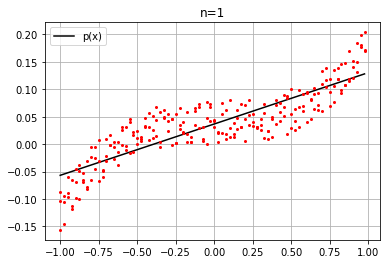

p =  -0.00789*x^2+0.09343*x^1+0.03934*x^0


<Figure size 432x288 with 0 Axes>

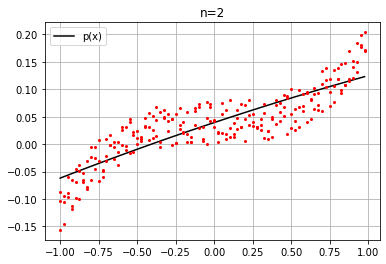

p =  0.15179*x^3+-0.0022*x^2+0.00246*x^1+0.0382*x^0


<Figure size 432x288 with 0 Axes>

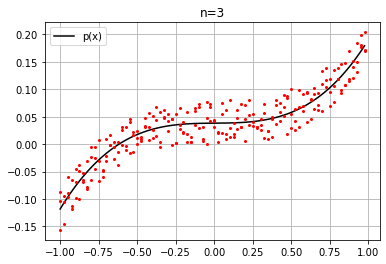

p =  -0.00525*x^4+0.15153*x^3+0.0023*x^2+0.00257*x^1+0.03775*x^0


<Figure size 432x288 with 0 Axes>

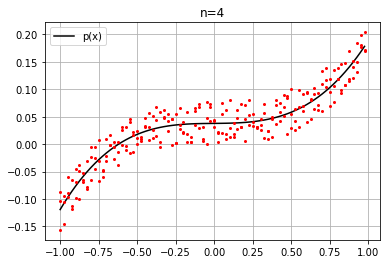

p =  -0.00101*x^5+-0.00532*x^4+0.15265*x^3+0.00234*x^2+0.00234*x^1+0.03775*x^0


<Figure size 432x288 with 0 Axes>

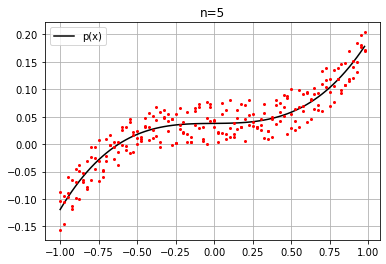

array([ 0.03775024,  0.00233582,  0.00234118,  0.15264879, -0.00531755,
       -0.00100826])

<Figure size 432x288 with 0 Axes>

In [8]:
least_squares_norm(1)
least_squares_norm(2)
least_squares_norm(3)
least_squares_norm(4)
least_squares_norm(5)

## Ортогональные уравнения

In [9]:
def p_ort(n, coeffs, Q):
    p=[]
    for i in range(total_points):
        sum_p = 0
        for j in range(n+1):
            sum_p+=Q[i][j]*coeffs[j]
        p.append(sum_p)
    X_ = X[:m]
    plt.figure(n)
    plt.grid()
    plt.plot(X, p, 'k', label='p(x)')
    title = 'n=' + str(n)
    plt.legend()
    plt.title(title)
    plt.plot(X_, Y[:m], 'or', markersize=2)
    plt.plot(X_, Y[m:2*m], 'or', markersize=2)
    plt.plot(X_, Y[2*m:3*m], 'or', markersize=2)
    return p

In [10]:
alphas = []
betas = []
def least_squares_ort(n, m):
    Q = np.zeros((m, n+1))  # матрица значений q_j(x_i) - в i-й строке (i=1,m) значения q_j(x_i), j=0,n   dim=(m, n+1)
    # сумма элементов Х, для вычисления q_1
    sum_X = 0
    for i in range(m):
        sum_X += X[i]
    # 
    for i in range(m):
        Q[i][0] = 1
        Q[i][1] = X[i] - sum_X/m
    for j in range(1, n):
        for i in range(m):
            # вычисление альфа, бета
            sum1 = 0
            sum2 = 0
            sum3 = 0
            sum4 = 0
            for k in range(m):
                sum1 += X[k] * Q[k][j]**2
                sum2 += Q[k][j]**2
                sum3 += X[k] * Q[k][j] * Q[k][j-1]
                sum4 += Q[k][j-1]**2
            alpha = sum1/sum2
            beta = sum3/sum4
            alphas.append(alpha)
            betas.append(betas)
            q_j = X[i]*Q[i][j] - alpha*Q[i][j] - beta*Q[i][j-1]
            Q[i][j+1] = q_j
    coeffs = []
    for k in range(n+1):
        sum1 = 0
        sum2 = 0
        for i in range(m):
            sum1 += Q[i][k] * Y[i]
            sum2 += Q[i][k]**2
        a_k = sum1/sum2
        coeffs.append(a_k)
    p = p_ort(n, coeffs, Q)
    return p

[-0.11920248799391149,
 -0.10770260184352223,
 -0.09678414274341318,
 -0.0864317563908534,
 -0.07663009343618321,
 -0.06736381066436661,
 -0.05861757217654368,
 -0.050376050571583154,
 -0.04262392812763491,
 -0.03534589798368228,
 -0.028526665321094713,
 -0.022150948545180068,
 -0.01620348046673727,
 -0.010669009483608648,
 -0.005532300762232437,
 -0.0007781374191952292,
 0.0036086782972154755,
 0.007643323825458899,
 0.011340955109188434,
 0.014716705415699239,
 0.01778568415437571,
 0.020562975695139048,
 0.023063638186894782,
 0.025302702375980302,
 0.027295170424612332,
 0.029056014729334573,
 0.03060017673946511,
 0.031942565775544045,
 0.03309805784778092,
 0.03408149447450237,
 0.034907681500599565,
 0.035591387915975735,
 0.03614734467399374,
 0.03659024350992361,
 0.03693473575939002,
 0.03719543117681988,
 0.03738689675388978,
 0.037523655537973634,
 0.03762018545059012,
 0.037690918105850235,
 0.037750237628904816,
 0.037812479474392126,
 0.037891929244885277,
 0.03800282150

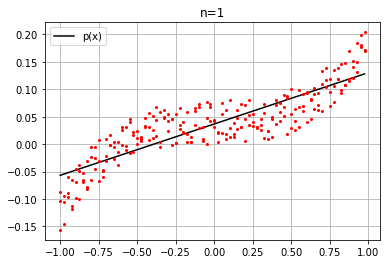

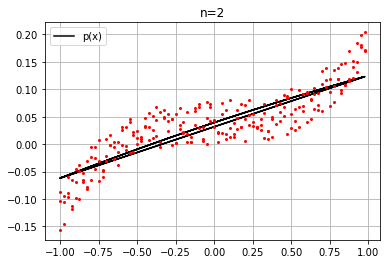

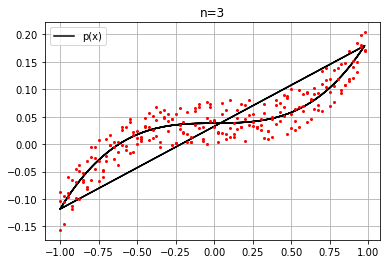

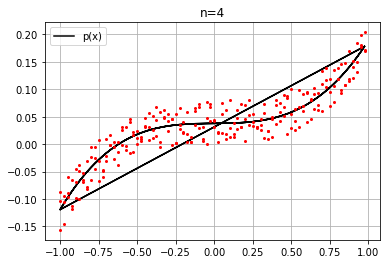

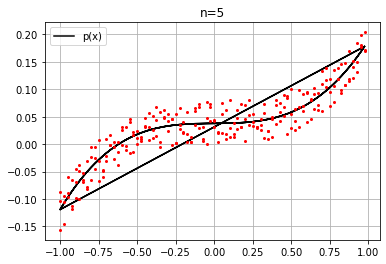

In [11]:
least_squares_ort(1, total_points)
least_squares_ort(2, total_points)
least_squares_ort(3, total_points)
least_squares_ort(4, total_points)
least_squares_ort(5, total_points)

## Построение таблицы

p =  0.09363*x^1+0.03671*x^0


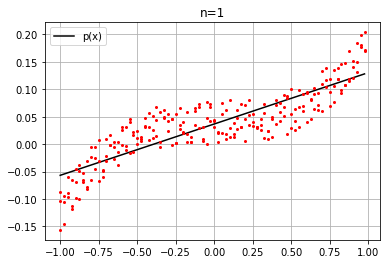

p =  -0.00789*x^2+0.09343*x^1+0.03934*x^0


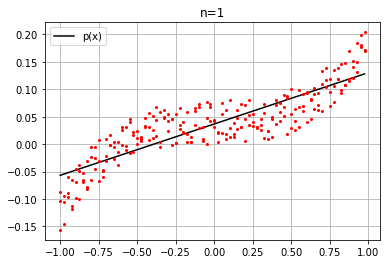

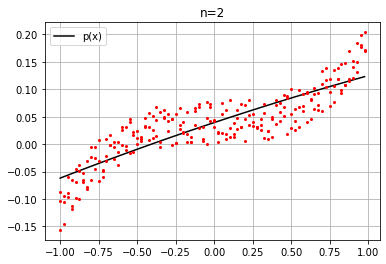

p =  0.15179*x^3+-0.0022*x^2+0.00246*x^1+0.0382*x^0


<Figure size 432x288 with 0 Axes>

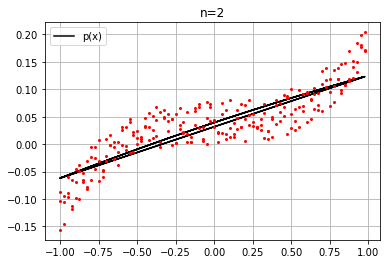

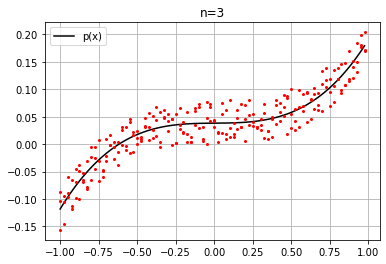

p =  -0.00525*x^4+0.15153*x^3+0.0023*x^2+0.00257*x^1+0.03775*x^0


<Figure size 432x288 with 0 Axes>

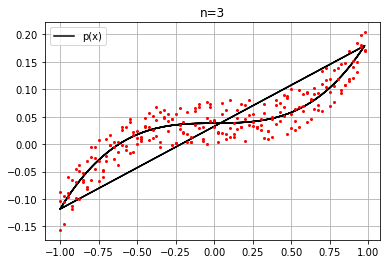

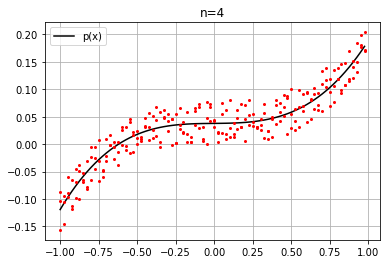

p =  -0.00101*x^5+-0.00532*x^4+0.15265*x^3+0.00234*x^2+0.00234*x^1+0.03775*x^0


<Figure size 432x288 with 0 Axes>

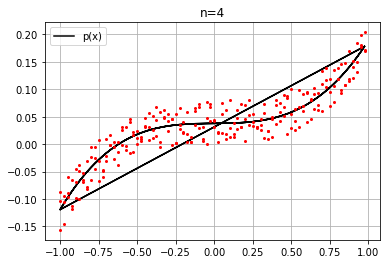

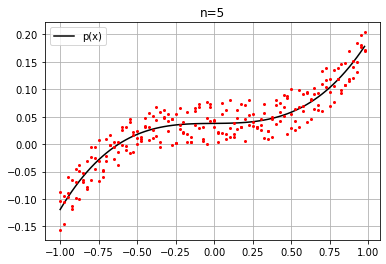

,n,MSE_normal,MSE_ortogonal
0,1.0,0.005941,0.005941
1,2.0,0.005934,0.005934
2,3.0,0.004236,0.004236
3,4.0,0.004237,0.004237
4,5.0,0.004237,0.004237


<Figure size 432x288 with 0 Axes>

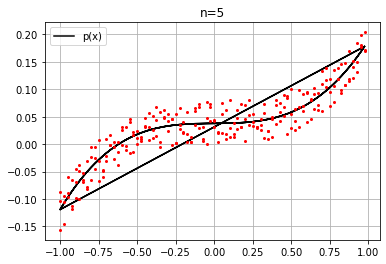

In [12]:
df = pd.DataFrame({'n':[], 'MSE_normal':[], 'MSE_ortogonal':[]})
for n in range(1, 6):
    coeffs = least_squares_norm(n)
    P_ort = least_squares_ort(n, total_points)
    MSE_norm = 0
    MSE_ort = 0
    for i in range(total_points):
        MSE_norm += (f(X[i]) - p(X[i], coeffs, n))**2
        MSE_ort += (f(X[i]) - P_ort[i])**2
    MSE_norm /= m
    MSE_ort /= m
    line = {'n':n, 'MSE_normal':MSE_norm, 'MSE_ortogonal':MSE_ort}
    df = df.append(line, ignore_index=True)
display(df)

In [13]:
display(df)

,n,MSE_normal,MSE_ortogonal
0,1.0,0.005941,0.005941
1,2.0,0.005934,0.005934
2,3.0,0.004236,0.004236
3,4.0,0.004237,0.004237
4,5.0,0.004237,0.004237
